In [2]:
import scipy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef
from termcolor import colored


In [3]:
data = scipy.io.loadmat('Dane_kalibracja_p300/p300_DS1.mat')
X, y = data["X"], data["Y"].ravel()
df = pd.DataFrame(X)
df['label'] = y.T
print(df)

             0           1          2          3           4          5  \
0    21.586568   13.865678  35.418458  23.002133   59.615603  43.019799   
1    10.038336    3.190109  12.601341  45.456217   27.925404  46.902588   
2    15.662260   19.012544  30.351975  16.966999   26.757476  41.644185   
3    54.136069    6.083398  14.051964  10.887053   17.794634  20.949373   
4    30.986576   20.291351  44.929102  31.491954   47.473579  38.827202   
5    11.185214   43.633196  10.050168  17.178736   39.662714   4.773889   
6     7.980026    7.332907  14.293290  15.113070   22.734330   8.020160   
7    19.544943    8.483811  10.784579  16.992990   38.810474  61.463519   
8    10.540034   25.392049  19.279626  47.676448   26.950805  50.567690   
9     2.473655   12.069200  77.680097  55.831714   36.676419  24.250666   
10    7.383957   13.546314  40.990284  11.272280   49.834665  32.594759   
11    4.999993    9.048012  11.609412  23.223159   79.225473  42.463748   
12   21.606735   48.58370

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35 non-null     float64
 1   1       35 non-null     float64
 2   2       35 non-null     float64
 3   3       35 non-null     float64
 4   4       35 non-null     float64
 5   5       35 non-null     float64
 6   6       35 non-null     float64
 7   7       35 non-null     float64
 8   8       35 non-null     float64
 9   9       35 non-null     float64
 10  10      35 non-null     float64
 11  11      35 non-null     float64
 12  12      35 non-null     float64
 13  13      35 non-null     float64
 14  14      35 non-null     float64
 15  15      35 non-null     float64
 16  16      35 non-null     float64
 17  17      35 non-null     float64
 18  18      35 non-null     float64
 19  19      35 non-null     float64
 20  20      35 non-null     float64
 21  label   35 non-null     uint8  
dtypes: f

In [5]:
print(df.describe())

                0           1          2          3           4          5  \
count   35.000000   35.000000  35.000000  35.000000   35.000000  35.000000   
mean    23.638865   18.898621  30.134981  30.312475   32.975041  32.742295   
std     32.736326   24.535061  23.461666  17.958461   24.338164  18.482737   
min      2.473655    1.863482   4.086328   8.929485    6.703402   4.773889   
25%      9.699379    7.016647  13.015333  15.320086   19.721037  20.449446   
50%     14.987925    9.611911  19.782214  22.234062   26.985335  28.900563   
75%     26.754334   18.571990  41.256682  46.408623   38.966467  42.741773   
max    199.217579  130.057188  92.259830  66.211395  141.181778  93.423623   

               6          7           8           9  ...          12  \
count  35.000000  35.000000   35.000000   35.000000  ...   35.000000   
mean   29.883167  32.000138   29.820829   32.916569  ...   36.101488   
std    18.505434  20.385519   21.087262   29.000085  ...   32.916235   
min     6

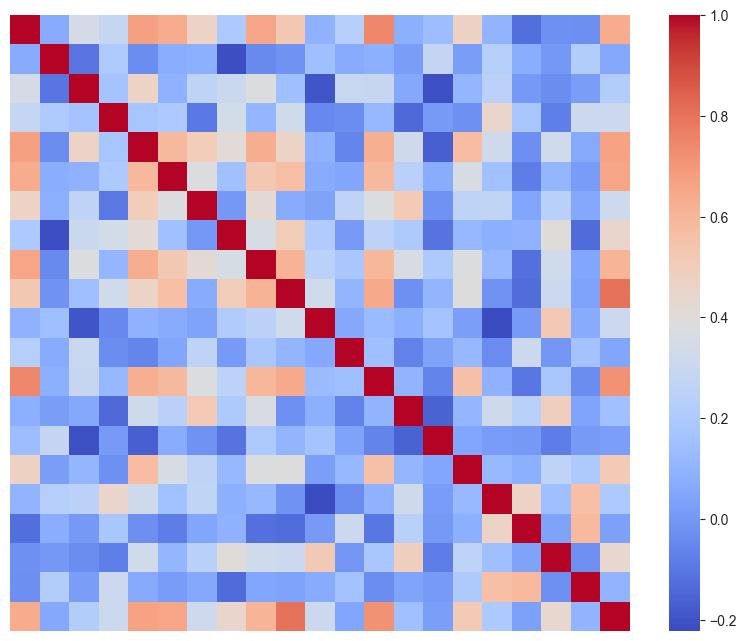

In [6]:
correlation_matrix = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, xticklabels=False, yticklabels=False)
plt.show()

In [7]:
data1 = scipy.io.loadmat('Dane_kalibracja_p300/p300_DS1.mat')
X1, y1 = data1["X"], data1["Y"].ravel()
z1 = np.zeros_like(y1)
data2 = scipy.io.loadmat('Dane_kalibracja_p300/p300_DS2.mat')
X2, y2 = data2["X"], data2["Y"].ravel()
z2 = np.zeros_like(y2) + 1
data3 = scipy.io.loadmat('Dane_kalibracja_p300/p300_DS3.mat')
X3, y3 = data3["X"], data3["Y"].ravel()
z3 = np.zeros_like(y3) + 2


In [8]:
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))
z = np.concatenate((z1, z2, z3))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=z)

In [9]:
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [10]:
X.shape

(106, 21)

In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.50      0.75      0.60         8

    accuracy                           0.64        22
   macro avg       0.65      0.66      0.63        22
weighted avg       0.69      0.64      0.64        22



In [12]:
# Tworzymy model regresji logistycznej
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000))
])

# Trenujemy model z wyszukiwaniem najlepszych hiperparametrów
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.62      0.62      0.62         8

    accuracy                           0.73        22
   macro avg       0.71      0.71      0.71        22
weighted avg       0.73      0.73      0.73        22



In [13]:
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10],  # Siła regularizacji
    'log_reg__solver': ['liblinear', 'saga', 'lbfgs']  # Metody optymalizacji
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Wybór najlepszego modelu
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Najlepsze parametry:", grid_search.best_params_)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.42      0.62      0.50         8

    accuracy                           0.55        22
   macro avg       0.56      0.56      0.54        22
weighted avg       0.60      0.55      0.55        22

Najlepsze parametry: {'log_reg__C': 0.001, 'log_reg__solver': 'liblinear'}


Fold number: 0
Precision = 0.6923076923076923
Recall = 0.75
Accuracy = 0.8055555555555556
F1 = 0.72
Matthews_corrcoef = 0.5725025740766715
Fold number: 1
Precision = 0.75
Recall = 0.5454545454545454
Accuracy = 0.8
F1 = 0.631578947368421
Matthews_corrcoef = 0.5108942227567661
Fold number: 2
Precision = 0.7857142857142857
Recall = 0.9166666666666666
Accuracy = 0.8857142857142857
F1 = 0.8461538461538461
Matthews_corrcoef = 0.7617834401336352


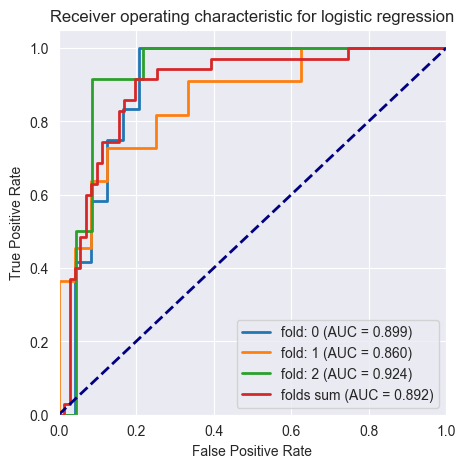

In [14]:
from sklearn.model_selection import GroupKFold

def plot_ROC(X, y, group):
    # Tworzymy obiekt wykonujący podziały próbki
    skf = GroupKFold(n_splits=3)
    
    # Definiujemy model który będzie optymalizowany
    pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('log_reg', LogisticRegression(C=0.01, solver='liblinear', max_iter=10000))
    ])
        
    # Przygotowujemy pole do rysowania
    plt.figure(figsize=(5, 5))
    
    # Licznik podziałów
    foldNumber = 0
    
    # Macierze przechowujące wyniki dla poszczególnych podziałów
    y_pred_sum = np.array([])
    y_true_sum = np.array([])

    for train_indices, test_indices in skf.split(X, y, groups=group):
        # Tworzymy zbiory uczący i testowy
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Wykonujemy dopasowanie do zbioru uczącego
        pipeline.fit(X_train, y_train)
        
        # Wypisujemy wartości metryk dla na zbiorze testowym
        print(colored("Fold number:", "red"), foldNumber)
        
        y_true = y_test
        y_pred = pipeline.predict(X_test)
        
        PPV = precision_score(y_true, y_pred)
        TPR = recall_score(y_true, y_pred)
        ACC = accuracy_score(y_true, y_pred)
        F1 = f1_score(y_true, y_pred)
        MCC = matthews_corrcoef(y_true, y_pred)
        
        print("Precision =", PPV)
        print("Recall =", TPR)
        print("Accuracy =", ACC)
        print("F1 =", F1)
        print("Matthews_corrcoef =", MCC)
        
        # Obliczamy wynik działania modelu (=prawdopodobieństwo przynależności do klas "0" i "1")
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Dołączamy wyniki dla danego podziału do macierzy przechowujących dane dla wszystkich podziałów
        y_pred_sum = np.append(y_pred_sum, y_pred_prob)
        y_true_sum = np.append(y_true_sum, y_true)
        
        # Obliczamy dane dla krzywej ROC: fpr, tpr, thresholds
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    
        # Obliczamy powierzchnię pod krzywą ROC
        roc_auc = auc(fpr, tpr)
        
        # Rysujemy krzywą ROC
        plt.plot(fpr, tpr, lw=2, label="fold: {:d} (AUC = {:0.3f})".format(foldNumber, roc_auc))
        foldNumber += 1
        
    # Obliczamy i rysujemy krzywą ROC dla sumy podziałów
    fpr, tpr, thresholds = roc_curve(y_true_sum, y_pred_sum)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label="folds sum (AUC = {:0.3f})".format(roc_auc))
    
    # Dodajemy krzywą ROC losowego klasyfikatora
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for logistic regression')
    plt.legend(loc="lower right")
    plt.show()

plot_ROC(X, y, z)